In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import math


In [2]:
PATH = '/home/users/dwest77/tbworkexp/01/'
data = os.listdir(PATH)
print(data)

['ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001102959z_20071001120855z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001102959z_20071001120

In [5]:
def concat(data, var, dimension, moving=False):
    movement_index = [0, 0, 0, 25, 100, 125, 175]
    var_data = []
    iterations = 0
    file_path =  '/home/users/dwest77/tbworkexp/01/'
    for file in data:
        file_direction = file_path + file
        current_file_var_data = xr.open_mfdataset(file_direction)[var]
        if moving:
            current_file_var_data += movement_index[iterations]

        iterations += 1
        var_data.append(current_file_var_data)
        
        

    var_data = xr.concat(var_data, dim=dimension)
    return var_data

In [3]:
identifier = {}
for file in data:
    key= file[73:80]
    if key in identifier:
        pass
#this file type has already been saved into the dictionary
    else:
        identifier[key] = file

print(identifier)

{'750_799': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', '000_049': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', '050_099': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', '700_749': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', '650_699': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', '600_649': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', '550_599': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc'}


In [4]:
uniquely_identified_files = list(identifier.values())
print(uniquely_identified_files)

['ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc']


In [6]:
satzen_values = concat(uniquely_identified_files, 'satzen', 'npi')
long_values = concat(uniquely_identified_files, 'longitude', 'npi', True)
lat_values = concat(uniquely_identified_files, 'latitude', 'npi')
time_values = concat(uniquely_identified_files, 'sensingtime_day', 'npi')

In [7]:
lat_filter = lat_values[satzen_values < 1.5]
long_filter = long_values[satzen_values < 1.5]
time_filter = time_values[satzen_values < 1.5]

long_filter = np.array(long_filter)
lat_filter = np.array(lat_filter)
time_filter = np.array(time_filter)
print(long_filter.shape, lat_filter.shape)

long_filter = list(np.reshape(long_filter, (157, 8)))
lat_filter = list(np.reshape(lat_filter, (157, 8)))
time_filter = list(np.reshape(lat_filter, (157, 8)))

mean_of_time = []
mean_of_lat = []
mean_of_long = []
for group_of_data in lat_filter:
    mean_of_lat.append(np.mean(group_of_data, None))

for group_of_data in long_filter:
    mean_of_long.append(np.mean(group_of_data, None))

for group_of_data in time_filter:
    mean_of_time.append(np.mean(group_of_data, None))

print(mean_of_time)
print(mean_of_lat)
print(mean_of_long)

(1256,) (1256,)
[68.44992, 67.58452, 66.71345, 65.83695, 64.954636, 64.069626, 63.179577, 61.83865, 60.940674, 60.039917, 59.136497, 58.2307, 57.32274, 56.412704, 55.500847, 54.587128, 53.671936, 52.755157, 51.836967, 50.917465, 49.996506, 49.074593, 48.151577, 47.227497, 46.302326, 45.37623, 44.44935, 43.52144, 42.59291, 41.663704, 40.73346, 39.802742, 38.87114, 37.93921, 37.00663, 36.073265, 35.139618, 34.205452, 33.27055, 32.33527, 31.399532, 30.463503, 29.527187, 28.590113, 27.65268, 26.714815, 25.776733, 24.838434, 23.899887, 22.960674, 22.021479, 21.082039, 20.14213, 19.202082, 18.26177, 17.321522, 16.380695, 81.225075, 81.33674, 81.347305, 81.25648, 81.066635, 80.78476, 80.41855, 79.97741, 79.470314, 78.90642, 78.294556, 77.640755, 76.95218, 76.23369, 75.49017, 74.724495, 73.94052, 73.14012, 72.326096, 71.49961, 70.66249, 69.81692, 68.962555, 68.10106, 67.23319, 51.839867, 52.758133, 53.67489, 54.590054, 55.503628, 56.415695, 57.32511, 58.23294, 59.13857, 60.041748, 60.942146, 6

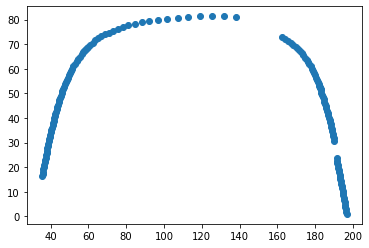

In [8]:
plt.scatter(mean_of_long, mean_of_lat)

In [9]:
test_to_variables = []
i = 36
while i <= 200:
    i += 4
    test_to_variables.append(i)

In [13]:
lat_buckets = []
for x in range(0, len(long_buckets)):
    lat_buckets.append([])

In [12]:
long_buckets = []
for x in range(0, 200, 4):
    long_buckets.append(x)

In [14]:
for x in range(len(mean_of_lat)):
    current_latitudanal_value = mean_of_lat[x]
    current_longitudanal_value = mean_of_long[x]
    bucket_id = (current_longitudanal_value)/4
    bucket_id = math.floor(bucket_id)
    print(current_longitudanal_value, current_latitudanal_value, bucket_id)
    lat_buckets[bucket_id].append(current_latitudanal_value)
    
print(lat_buckets)

59.38578 68.44992 14
58.30545 67.58452 14
57.296833 66.71345 14
56.352608 65.83695 14
55.464832 64.954636 13
54.63257 64.069626 13
53.845676 63.179577 13
52.744843 61.83865 13
52.05803 60.940674 13
51.40554 60.039917 12
50.783928 59.136497 12
50.190895 58.2307 12
49.624084 57.32274 12
49.08127 56.412704 12
48.5606 55.500847 12
48.060448 54.587128 12
47.579582 53.671936 11
47.115906 52.755157 11
46.6688 51.836967 11
46.236584 50.917465 11
45.818596 49.996506 11
45.41363 49.074593 11
45.02108 48.151577 11
44.639965 47.227497 11
44.269787 46.302326 11
43.909462 45.37623 10
43.55851 44.44935 10
43.2164 43.52144 10
42.882637 42.59291 10
42.556892 41.663704 10
42.238037 40.73346 10
41.926437 39.802742 10
41.620895 38.87114 10
41.322266 37.93921 10
41.028755 37.00663 10
40.740868 36.073265 10
40.458103 35.139618 10
40.180138 34.205452 10
39.906986 33.27055 9
39.638268 32.33527 9
39.373917 31.399532 9
39.112717 30.463503 9
38.855038 29.527187 9
38.60154 28.590113 9
38.35125 27.65268 9
38.10381

In [15]:
mean_of_lat_buckets = []
mean_of_long_buckets = []
for bid, bucket in enumerate(lat_buckets):
    total = 0
    for val in bucket:
        total += val
    if len(bucket) != 0:
        total = total / len(bucket)
        mean_of_lat_buckets.append(total)
        mean_of_long_buckets.append(long_buckets[bid])

print(mean_of_long_buckets)
print(mean_of_lat_buckets)

[32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 112, 116, 124, 128, 136, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196]
[17.32132911682129, 26.242319226264954, 39.79808807373047, 49.992669423421226, 57.31864765712193, 62.9966323852539, 67.55452074323382, 70.65967305501302, 72.73310852050781, 74.3325080871582, 75.86193084716797, 76.95217895507812, 77.64075469970703, 78.2945556640625, 78.90641784667969, 79.4703140258789, 79.97740936279297, 80.41854858398438, 80.78475952148438, 81.06663513183594, 81.25647735595703, 81.34730529785156, 81.33673858642578, 81.2250747680664, 73.06367492675781, 71.41726430257161, 68.44729042053223, 64.95373725891113, 60.03673825945173, 52.836035988547586, 43.423086166381836, 30.143909613291424, 11.863453110059103, 1.9764919678370159]


In [17]:
mean_of_lat_buckets[3]

49.992669423421226

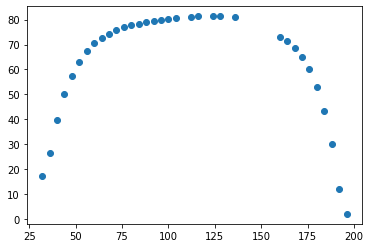

In [18]:
plt.scatter(mean_of_long_buckets, mean_of_lat_buckets)
plt.show()

In [110]:
json_file_coords = np.reshape(np.transpose([mean_of_long_buckets, mean_of_lat_buckets]), (len(mean_of_lat_buckets), 2))

In [111]:
print(json_file_coords.tolist())

[[32.0, 17.32132911682129], [36.0, 26.242319226264954], [40.0, 39.79808807373047], [44.0, 49.992669423421226], [48.0, 57.31864765712193], [52.0, 62.9966323852539], [56.0, 67.55452074323382], [60.0, 70.65967305501302], [64.0, 72.73310852050781], [68.0, 74.3325080871582], [72.0, 75.86193084716797], [76.0, 76.95217895507812], [80.0, 77.64075469970703], [84.0, 78.2945556640625], [88.0, 78.90641784667969], [92.0, 79.4703140258789], [96.0, 79.97740936279297], [100.0, 80.41854858398438], [104.0, 80.78475952148438], [112.0, 81.06663513183594], [116.0, 81.25647735595703], [124.0, 81.34730529785156], [128.0, 81.33673858642578], [136.0, 81.2250747680664], [160.0, 73.06367492675781], [164.0, 71.41726430257161], [168.0, 68.44729042053223], [172.0, 64.95373725891113], [176.0, 60.03673825945173], [180.0, 52.836035988547586], [184.0, 43.423086166381836], [188.0, 30.143909613291424], [192.0, 11.863453110059103], [196.0, 1.9764919678370159]]


In [114]:
second_array = []
for value in mean_of_lat_buckets:
    value = value * -1
    second_array.append(value)

print(second_array)

[-17.32132911682129, -26.242319226264954, -39.79808807373047, -49.992669423421226, -57.31864765712193, -62.9966323852539, -67.55452074323382, -70.65967305501302, -72.73310852050781, -74.3325080871582, -75.86193084716797, -76.95217895507812, -77.64075469970703, -78.2945556640625, -78.90641784667969, -79.4703140258789, -79.97740936279297, -80.41854858398438, -80.78475952148438, -81.06663513183594, -81.25647735595703, -81.34730529785156, -81.33673858642578, -81.2250747680664, -73.06367492675781, -71.41726430257161, -68.44729042053223, -64.95373725891113, -60.03673825945173, -52.836035988547586, -43.423086166381836, -30.143909613291424, -11.863453110059103, -1.9764919678370159]


In [115]:
full_lat_movement = second_array + mean_of_lat_buckets

In [116]:
print(full_lat_movement)

[17.32132911682129, 26.242319226264954, 39.79808807373047, 49.992669423421226, 57.31864765712193, 62.9966323852539, 67.55452074323382, 70.65967305501302, 72.73310852050781, 74.3325080871582, 75.86193084716797, 76.95217895507812, 77.64075469970703, 78.2945556640625, 78.90641784667969, 79.4703140258789, 79.97740936279297, 80.41854858398438, 80.78475952148438, 81.06663513183594, 81.25647735595703, 81.34730529785156, 81.33673858642578, 81.2250747680664, 73.06367492675781, 71.41726430257161, 68.44729042053223, 64.95373725891113, 60.03673825945173, 52.836035988547586, 43.423086166381836, 30.143909613291424, 11.863453110059103, 1.9764919678370159, -17.32132911682129, -26.242319226264954, -39.79808807373047, -49.992669423421226, -57.31864765712193, -62.9966323852539, -67.55452074323382, -70.65967305501302, -72.73310852050781, -74.3325080871582, -75.86193084716797, -76.95217895507812, -77.64075469970703, -78.2945556640625, -78.90641784667969, -79.4703140258789, -79.97740936279297, -80.418548583

In [120]:
temp_long_movement = mean_of_long_buckets + mean_of_long_buckets
print(temp_long_movement)

[32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 112, 116, 124, 128, 136, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 112, 116, 124, 128, 136, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196]


In [121]:
len(temp_long_movement)

68

In [14]:
full_long_movement = []
for value in temp_long_movement[34:]:
    value -= 168
    full_long_movement.append(value)

print(full_long_movement)
full_long_movement = mean_of_long_buckets + full_long_movement
print(full_long_movement)


NameError: name 'temp_long_movement' is not defined

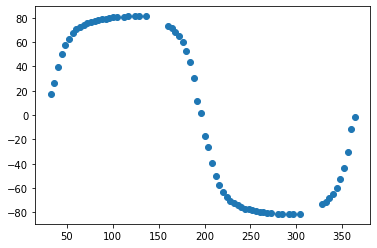

In [136]:
plt.scatter(full_long_movement, full_lat_movement)

In [50]:
file_path =  '/home/users/dwest77/tbworkexp/01/'
chosen_var = 'sensingtime_msec'

def finding_var_diff(var, file_path, file_name):

    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])

    min_var = np.min(open_file)
    max_var  = np.max(open_file)
    min_avr = min_var / len(open_file)
    max_avr = max_var / len(open_file)
    return max_avr - min_avr


def finding_length_of_file(var, file_path, file_name):
    open_file = np.array(xr.open_mfdataset(file_path + file_name)[var])
    length = len(open_file)
    return length


list_of_time_avrs = []
list_of_lengths_files = []
for file in uniquely_identified_files:
    time_difference = finding_var_diff(chosen_var, file_path, file)
    length_of_file = finding_length_of_file(chosen_var, file_path, file)
    list_of_lengths_files.append(length_of_file)
    list_of_time_avrs.append(time_difference)

print(list_of_time_avrs)
print(list_of_lengths_files)


[61.90476190476147, 65.33183333333272, 65.33133333333353, 65.33183333333363, 65.33183333333182, 65.33200000000033, 65.33183333333363]
[1680, 6000, 6000, 6000, 6000, 6000, 6000]


In [52]:
sum = 0
denom = 0
for i in range(len(list_of_time_avrs)):
    sum += list_of_lengths_files[i] * list_of_time_avrs[i]
    denom += list_of_lengths_files[i]


mean_dist_of_points = sum / denom
print(mean_dist_of_points)

65.17898089171958


In [53]:
n_points = 0
for val in list_of_lengths_files:
    n_points += val

total_time_of_points = (n_points) * mean_dist_of_points * 14

In [54]:
total_time_of_points_sec = total_time_of_points * 0.001

In [62]:
total_time_of_points_mins = total_time_of_points_sec / 60

In [59]:
total_time_of_points_hours = total_time_of_points_sec / 3600

In [63]:
print(total_time_of_points_mins, total_time_of_points_hours)

573.0535999999986 9.55089333333331
